<a href="https://colab.research.google.com/github/sunnysavita10/Generative-AI-Indepth-Basic-to-Advance/blob/main/Conversational_Summary_Memory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

langchain.memory = https://api.python.langchain.com/en/latest/langchain_api_reference.html#module-langchain.memory

In [2]:
!pip install langchain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 396.4/396.4 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.5/290.5 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.1 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


In [3]:
!pip install langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 2.3 MB/s eta 0:00:00


In [4]:
!pip install langchain-groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 kB 5.9 MB/s eta 0:00:00


In [47]:
import os
from google.colab import userdata

In [48]:
GROQ_API_KEY=userdata.get('GROQ_API_KEY')
os.environ["GROQ_API_KEY"] = GROQ_API_KEY

gootle_api_key = https://aistudio.google.com/app/apikey

langsmith_api_key = https://smith.langchain.com/o/2b36e0a1-975c-5806-b1e4-d6ee61291578/?paginationState=%7B%22pageIndex%22%3A0%2C%22pageSize%22%3A5%7D

tavily_api_key = https://app.tavily.com/home?code=agSQxU1mafqqUJbBeeDMnjIM1b4DsEtCPrzDP5gNFhSEx&state=eyJyZXR1cm5UbyI6Ii9ob21lIn0

In [49]:
LANGCHAIN_API_KEY=userdata.get('LANGCHAIN_API_KEY')
os.environ["LANGCHAIN_API_KEY"] = LANGCHAIN_API_KEY

In [50]:
os.environ["LANGCHAIN_PROJECT"]="memorylogs"
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_ENDPOINT"] = "https://api.smith.langchain.com"

model = https://console.groq.com/docs/models

In [51]:
from langchain_groq import ChatGroq
model=ChatGroq(model_name="Gemma2-9b-It")

In [52]:
model.invoke("Hi, what's up?")

AIMessage(content="Not much, just hanging out in the digital world, waiting to answer questions and have conversations!\n\nWhat about you? What's going on in your world today? 😊\n", response_metadata={'token_usage': {'completion_tokens': 38, 'prompt_tokens': 16, 'total_tokens': 54, 'completion_time': 0.069090909, 'prompt_time': 7.395e-05, 'queue_time': 0.014561937, 'total_time': 0.069164859}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-7f3ef72f-e804-46ee-bbfd-e4c5a626bf0d-0', usage_metadata={'input_tokens': 16, 'output_tokens': 38, 'total_tokens': 54})

# ConversationSummaryMemory
doc = https://python.langchain.com/v0.1/docs/modules/memory/types/summary/

parameters_class = https://api.python.langchain.com/en/latest/memory/langchain.memory.summary.ConversationSummaryMemory.html#langchain.memory.summary.ConversationSummaryMemory

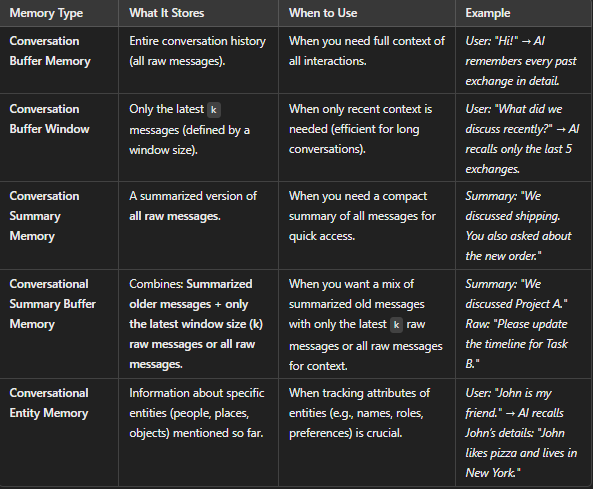 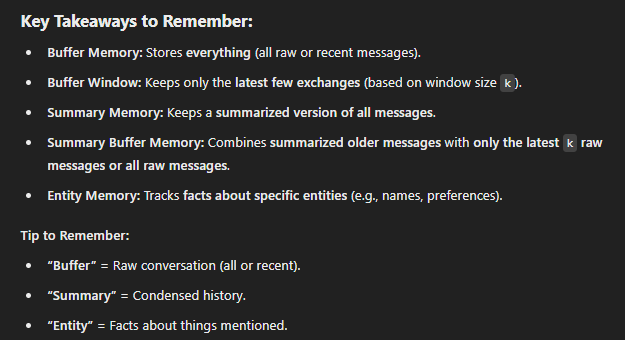

In [53]:
from langchain.memory import ConversationSummaryMemory

In [54]:
from langchain.memory import ChatMessageHistory

In [55]:
## first way to store and getting conversation
memory = ConversationSummaryMemory(llm=model, return_messages=True) # model will summarize the conversation and then provide in list

In [56]:
memory.save_context(
    {"input": "Sunny and Mayank are working on a hackathon project."},
    {"output": "That's awesome! What's the hackathon project about?"}
)

In [57]:
memory.load_memory_variables({})

{'history': [SystemMessage(content="Human: Sunny and Mayank are working on a hackathon project. \nAI: That's awesome! What's the hackathon project about? \n\nNew summary: The human mentions that Sunny and Mayank are working on a hackathon project and the AI expresses enthusiasm, asking for more details about it. \n")]}

In [58]:
summary=memory.load_memory_variables({})

In [59]:
summary

{'history': [SystemMessage(content="Human: Sunny and Mayank are working on a hackathon project. \nAI: That's awesome! What's the hackathon project about? \n\nNew summary: The human mentions that Sunny and Mayank are working on a hackathon project and the AI expresses enthusiasm, asking for more details about it. \n")]}

In [60]:
print(summary["history"][0].content)

Human: Sunny and Mayank are working on a hackathon project. 
AI: That's awesome! What's the hackathon project about? 

New summary: The human mentions that Sunny and Mayank are working on a hackathon project and the AI expresses enthusiasm, asking for more details about it. 



In [61]:
memory.save_context(
    {"input": "It's a machine learning project focused on healthcare."},
    {"output": "Sounds exciting! Are they building a prediction model or something else"}
)
memory.save_context(
    {"input": "Yes, they’re working on a model to predict patient outcomes."},
    {"output": "Impressive! How far along are they with the project?"}
)

In [62]:
memory.load_memory_variables({})

{'history': [SystemMessage(content='The human mentions that Sunny and Mayank are working on a hackathon project focused on healthcare. The AI is excited and asks if they are building a prediction model or something else. The human confirms that they are working on a model to predict patient outcomes. The AI is impressed and asks how far along they are with the project. \n')]}

In [63]:
summary=memory.load_memory_variables({})

In [64]:
print(summary["history"][0].content)

The human mentions that Sunny and Mayank are working on a hackathon project focused on healthcare. The AI is excited and asks if they are building a prediction model or something else. The human confirms that they are working on a model to predict patient outcomes. The AI is impressed and asks how far along they are with the project. 



In [67]:
memory.load_memory_variables({})

{'history': [SystemMessage(content='The human mentions that Sunny and Mayank are working on a hackathon project focused on healthcare, specifically a model to predict patient outcomes. The AI is impressed by the project and asks how far along they are with it. \n')]}

In [89]:
print('Progressively summarize the lines of conversation provided, adding onto the previous summary returning a new summary.\n\nEXAMPLE\nCurrent summary:\nThe human asks what the AI thinks of artificial intelligence. The AI thinks artificial intelligence is a force for good.\n\nNew lines of conversation:\nHuman: Why do you think artificial intelligence is a force for good?\nAI: Because artificial intelligence will help humans reach their full potential.\n\nNew summary:\nThe human asks what the AI thinks of artificial intelligence. The AI thinks artificial intelligence is a force for good because it will help humans reach their full potential.\nEND OF EXAMPLE\n\nCurrent summary:\n{summary}\n\nNew lines of conversation:\n{new_lines}\n\nNew summary:')

Progressively summarize the lines of conversation provided, adding onto the previous summary returning a new summary.

EXAMPLE
Current summary:
The human asks what the AI thinks of artificial intelligence. The AI thinks artificial intelligence is a force for good.

New lines of conversation:
Human: Why do you think artificial intelligence is a force for good?
AI: Because artificial intelligence will help humans reach their full potential.

New summary:
The human asks what the AI thinks of artificial intelligence. The AI thinks artificial intelligence is a force for good because it will help humans reach their full potential.
END OF EXAMPLE

Current summary:
{summary}

New lines of conversation:
{new_lines}

New summary:


In [68]:
memory.chat_memory

InMemoryChatMessageHistory(messages=[HumanMessage(content='Sunny and Mayank are working on a hackathon project.'), AIMessage(content="That's awesome! What's the hackathon project about?"), HumanMessage(content="It's a machine learning project focused on healthcare."), AIMessage(content='Sounds exciting! Are they building a prediction model or something else'), HumanMessage(content='Yes, they’re working on a model to predict patient outcomes.'), AIMessage(content='Impressive! How far along are they with the project?'), HumanMessage(content='Yes, they’re working on a model to predict patient outcomes.'), AIMessage(content='Impressive! How far along are they with the project?')])

In [70]:
memory.chat_memory.messages

[HumanMessage(content='Sunny and Mayank are working on a hackathon project.'),
 AIMessage(content="That's awesome! What's the hackathon project about?"),
 HumanMessage(content="It's a machine learning project focused on healthcare."),
 AIMessage(content='Sounds exciting! Are they building a prediction model or something else'),
 HumanMessage(content='Yes, they’re working on a model to predict patient outcomes.'),
 AIMessage(content='Impressive! How far along are they with the project?'),
 HumanMessage(content='Yes, they’re working on a model to predict patient outcomes.'),
 AIMessage(content='Impressive! How far along are they with the project?')]

In [71]:
messages = memory.chat_memory.messages

In [72]:
messages

[HumanMessage(content='Sunny and Mayank are working on a hackathon project.'),
 AIMessage(content="That's awesome! What's the hackathon project about?"),
 HumanMessage(content="It's a machine learning project focused on healthcare."),
 AIMessage(content='Sounds exciting! Are they building a prediction model or something else'),
 HumanMessage(content='Yes, they’re working on a model to predict patient outcomes.'),
 AIMessage(content='Impressive! How far along are they with the project?'),
 HumanMessage(content='Yes, they’re working on a model to predict patient outcomes.'),
 AIMessage(content='Impressive! How far along are they with the project?')]

In [73]:
previous_summary=""

In [74]:
## second way to store and getting conversation
memory.predict_new_summary(messages, previous_summary)

'New summary: The human tells the AI that Sunny and Mayank are working on a machine learning project for a hackathon focused on healthcare. They are building a model to predict patient outcomes. The AI is impressed and asks how far along they are in the project. \n'

In [75]:
history = ChatMessageHistory()

In [76]:
history.add_user_message("Hi")

In [77]:
history.add_ai_message("Hello, how can I assist you today?")

In [78]:
## third way to store and getting conversation
ConversationSummaryMemory.from_messages(
    llm=model,
    chat_memory=history,
    memory_key="summary", # Key where the summary of the conversation will be stored.
    human_prefix="User", # Prefix to identify and store the user's input in the summary memory.
    ai_prefix="AI" # Prefix to identify and store the AI's responses in the summary memory.
)

ConversationSummaryMemory(human_prefix='User', llm=ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7d084365f460>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7d0843e05a80>, model_name='Gemma2-9b-It', groq_api_key=SecretStr('**********')), chat_memory=InMemoryChatMessageHistory(messages=[HumanMessage(content='Hi'), AIMessage(content='Hello, how can I assist you today?')]), buffer='New summary: A user greets the AI with a "Hi". The AI responds with a polite "Hello" and offers to assist the user. \n', memory_key='summary')

In [80]:
memory.buffer

'User: Hi\nAI: Hello, how can I assist you today?\n\nNew summary: A user greeted the AI and the AI responded with a greeting and an offer of assistance. \n'

# From here the chaining starting

In [82]:
## fourth way to store and getting conversation
from langchain.chains import ConversationChain
conversation_with_summary = ConversationChain(
    llm=model,
    memory=ConversationSummaryMemory(llm=model), # model will summarize the conversation
    verbose=True
)

<ipython-input-82-8b7904464e70>:2: LangChainDeprecationWarning: The class `ConversationChain` was deprecated in LangChain 0.2.7 and will be removed in 1.0. Use RunnableWithMessageHistory: https://python.langchain.com/v0.2/api_reference/core/runnables/langchain_core.runnables.history.RunnableWithMessageHistory.html instead.
  conversation_with_summary = ConversationChain(


In [83]:
conversation_with_summary.predict(input="Hi, what's up?")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:

Human: Hi, what's up?
AI:

> Finished chain.


"Hi there! Not much, just waiting to see what interesting questions you have for me.  How about you? What's going on in your world today? \n"

In [84]:
conversation_with_summary.predict(input="Sunny and Mayank are working on a mlops production ready project.")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
New summary: 

The human greets the AI and asks what it's up to. The AI responds by saying it's waiting for interesting questions and asks the human what's going on in their world. 

Human: Sunny and Mayank are working on a mlops production ready project.
AI:

> Finished chain.


"That sounds fascinating!  MLOps is such a hot topic right now.  \n\nTell me more about their project. What kind of model are they working with? What are some of the challenges they're facing in making it production-ready? I'm always eager to learn about real-world applications of machine learning. \n\n"

In [85]:
conversation_with_summary.predict(input="It's project focused on healthcare.")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
The human greets the AI and asks what it's up to. The AI responds by saying it's waiting for interesting questions and asks the human what's going on in their world. The human tells the AI that Sunny and Mayank are working on a production-ready MLOps project. The AI expresses interest in the project and asks for more details, such as the type of model they are using and the challenges they are facing. 

Human: It's project focused on healthcare.
AI:

> Finished chain.


"That's fascinating! Healthcare is such a complex and important field.  Tell me more about this project. What kind of health problems are they trying to address with this MLOps project? Are they using it for diagnosis, treatment planning, drug discovery, or something else entirely? \n\nI'm eager to learn about the specific challenges they're facing in making it production-ready.  Data privacy and security are always major concerns in healthcare, for example.  Are there any other unique hurdles they're encountering? \n\n"

In [86]:
conversation_with_summary.predict(input="so can you describe mlops pipeline to me with in six point.")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
The human greets the AI and asks what it's up to. The AI responds by saying it's waiting for interesting questions and asks the human what's going on in their world. The human tells the AI that Sunny and Mayank are working on a production-ready MLOps project focused on healthcare. The AI expresses interest in the project and asks for more details, such as the type of model they are using and the challenges they are facing. The human clarifies that the project focuses on healthcare. The AI, intrigued by the field's complexity and importance, asks about the specific health problems the project addresses, whether it's for diagnosis, treatment planning, drug discovery, or 

'You got it!  Describing an MLOps pipeline in six points is a great way to get a handle on the key concepts. Here\'s one way to do it:\n\n1. **Data Collection & Preparation:** This is where you gather the raw data needed for your model and clean, transform, and prepare it for training. Think of it like gathering ingredients and chopping them up before you start cooking. \n2. **Model Development:**  This is where the "magic" happens! You choose a suitable machine learning algorithm, train it on your prepared data, and fine-tune its parameters to achieve the best performance.  \n3. **Model Evaluation:** Before deploying your model, you rigorously test and evaluate its performance on unseen data. This helps you understand how well it will generalize to real-world scenarios.\n4. **Model Deployment:**  This involves making your trained model accessible for use. It could be deployed as a web service, integrated into an application, or run on edge devices.\n5. **Monitoring & Maintenance:**  O

You got it!  Describing an MLOps pipeline in six points is a great way to get a handle on the key concepts. Here's one way to do it:

1. **Data Collection & Preparation:** This is where you gather the raw data needed for your model and clean, transform, and prepare it for training. Think of it like gathering ingredients and chopping them up before you start cooking.
2. **Model Development:**  This is where the "magic" happens! You choose a suitable machine learning algorithm, train it on your prepared data, and fine-tune its parameters to achieve the best performance.  
3. **Model Evaluation:** Before deploying your model, you rigorously test and evaluate its performance on unseen data. This helps you understand how well it will generalize to real-world scenarios.
4. **Model Deployment:**  This involves making your trained model accessible for use. It could be deployed as a web service, integrated into an application, or run on edge devices.
5. **Monitoring & Maintenance:**  Once deployed, you continuously monitor the model's performance in the real world.  You might also need to retrain or update the model periodically to ensure it stays accurate and relevant.
6. **Versioning & Experiment Tracking:**  Throughout the pipeline, it's crucial to track all changes to your code, data, and model parameters. This allows you to roll back to previous versions if needed and understand how different decisions impacted your model's performance.



Let me know if you'd like me to elaborate on any of these points or if you have other questions about MLOps!


In [87]:
conversation_with_summary.predict(input="How many total points are there?")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
The human greets the AI and asks what it's up to. The AI responds by saying it's waiting for interesting questions and asks the human what's going on in their world. The human tells the AI that Sunny and Mayank are working on a production-ready MLOps project focused on healthcare. The AI expresses interest in the project and asks for more details, such as the type of model they are using and the challenges they are facing. The human clarifies that the project focuses on healthcare. The AI, intrigued by the field's complexity and importance, asks about the specific health problems the project addresses, whether it's for diagnosis, treatment planning, drug discovery, or 

'There are **6** total points in an MLOps pipeline.  😊  \n\nI listed them all for you! \n\n'

In [88]:
conversation_with_summary.predict(input="can you give me 5th point with explaination")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
The human greets the AI and asks what it's up to. The AI responds by saying it's waiting for interesting questions and asks the human what's going on in their world. The human tells the AI that Sunny and Mayank are working on a production-ready MLOps project focused on healthcare. The AI expresses interest in the project and asks for more details, such as the type of model they are using and the challenges they are facing. The human clarifies that the project focuses on healthcare. The AI, intrigued by the field's complexity and importance, asks about the specific health problems the project addresses, whether it's for diagnosis, treatment planning, drug discovery, or 

"Absolutely!  The fifth point in an MLOps pipeline is **Monitoring and Maintenance**. \n\nThis stage is crucial because it ensures that the deployed model continues to perform well in the real world.  \n\nHere's a breakdown:\n\n* **Performance Tracking:**  We continuously monitor the model's performance metrics, like accuracy, precision, recall, and F1-score.  This helps us detect any degradation in performance over time.\n* **Data Drift Detection:**  Real-world data can change, and if the input data distribution shifts significantly from what the model was trained on, its performance can suffer.  We use techniques to detect these data drifts.\n* **Error Analysis:**  We analyze any errors or unexpected outputs from the model to understand the reasons behind them. This can help us identify areas for improvement in the model or the data.\n* **Model Retraining:**  Based on performance monitoring and data drift detection, we might need to retrain the model with updated data to maintain its

Absolutely!  The fifth point in an MLOps pipeline is **Monitoring and Maintenance**.

This stage is crucial because it ensures that the deployed model continues to perform well in the real world.  

Here's a breakdown:

* **Performance Tracking:**  We continuously monitor the model's performance metrics, like accuracy, precision, recall, and F1-score.  This helps us detect any degradation in performance over time.
* **Data Drift Detection:**  Real-world data can change, and if the input data distribution shifts significantly from what the model was trained on, its performance can suffer.  We use techniques to detect these data drifts.
* **Error Analysis:**  We analyze any errors or unexpected outputs from the model to understand the reasons behind them. This can help us identify areas for improvement in the model or the data.
* **Model Retraining:**  Based on performance monitoring and data drift detection, we might need to retrain the model with updated data to maintain its effectiveness.
* **System Health Checks:**  We also monitor the infrastructure and systems supporting the model deployment to ensure they are running smoothly and securely.


Think of monitoring and maintenance like keeping your car in top shape. You need regular checkups, oil changes, and repairs to keep it running efficiently and safely.





In [90]:

conversation_with_summary.memory.buffer # provide a summarized version of the conversation

'The human greets the AI and asks what it\'s up to. The AI responds by saying it\'s waiting for interesting questions and asks the human what\'s going on in their world. The human tells the AI that Sunny and Mayank are working on a production-ready MLOps project focused on healthcare. The AI expresses interest in the project and asks for more details, such as the type of model they are using and the challenges they are facing. The human clarifies that the project focuses on healthcare. The AI, intrigued by the field\'s complexity and importance, asks about the specific health problems the project addresses, whether it\'s for diagnosis, treatment planning, drug discovery, or something else. It also expresses interest in the unique challenges they face, particularly regarding data privacy and security in healthcare.  The human then asks the AI to describe an MLOps pipeline in six points. The AI obliges, providing a concise explanation of each stage: data collection and preparation, model

# Conversation Summary Buffer Memory 
(Summarized older messages + Recent (not summarized)raw messages (within the window size or token limit))

doc = https://python.langchain.com/v0.1/docs/modules/memory/types/summary_buffer/

parameters_class = https://api.python.langchain.com/en/latest/memory/langchain.memory.summary_buffer.ConversationSummaryBufferMemory.html#langchain.memory.summary_buffer.ConversationSummaryBufferMemory

While summary is good, we know that recent conversation has high correlation to upcoming query and

A summary of old conversation with a buffer memory of last few conversation would be a good combination. This class exactly does that.

You can set the token limit which define how much historical conversation to be kept along with the summary. Higher the token size more the exact conversation history kept as-it-is.

In [91]:
from langchain.memory import ConversationSummaryBufferMemory

In [92]:
memory2 = ConversationSummaryBufferMemory(llm=model,return_messages=True)

In [93]:
## first way to store and getting conversation
memory2.save_context(
    {"input": "It's a machine learning project focused on healthcare."},
    {"output": "Sounds exciting! Are they building a prediction model or something else"}
)
memory2.save_context(
    {"input": "Yes, they’re working on a model to predict patient outcomes."},
    {"output": "Impressive! How far along are they with the project?"}
)


In [94]:
memory2.load_memory_variables({})

{'history': [HumanMessage(content="It's a machine learning project focused on healthcare."),
  AIMessage(content='Sounds exciting! Are they building a prediction model or something else'),
  HumanMessage(content='Yes, they’re working on a model to predict patient outcomes.'),
  AIMessage(content='Impressive! How far along are they with the project?')]}

In [95]:
# Summarized older messages and keep recent 50-token raw messages (within the window size or token limit = 50)
memory3 = ConversationSummaryBufferMemory(llm=model,return_messages=True,max_token_limit=50)

In [98]:
memory3.save_context(
    {"input": "Sunny and Mayank are working on a hackathon project."},
    {"output": "That's awesome! What's the hackathon project about?"}
)
memory3.save_context(
    {"input": "It's a machine learning project focused on healthcare."},
    {"output": "Sounds exciting! Are they building a prediction model or something else?"}
)
memory3.save_context(
    {"input": "Yes, they’re working on a model to predict patient outcomes."},
    {"output": "Impressive! Wishing Sunny and Mayank all the best for their project."}
)

In [97]:
#memory3.clear()

In [101]:
memory3.load_memory_variables({})["history"] # raw message(conversation)

[SystemMessage(content="A human mentions that Sunny and Mayank are working on a hackathon project. The AI expresses enthusiasm and asks about the project. The human reveals that it's a machine learning project focused on healthcare. \n"),
 AIMessage(content='Sounds exciting! Are they building a prediction model or something else?'),
 HumanMessage(content='Yes, they’re working on a model to predict patient outcomes.'),
 AIMessage(content='Impressive! Wishing Sunny and Mayank all the best for their project.')]

In [103]:
memory3.load_memory_variables({})["history"][0].content # summarized conversation

"A human mentions that Sunny and Mayank are working on a hackathon project. The AI expresses enthusiasm and asks about the project. The human reveals that it's a machine learning project focused on healthcare. \n"

AIMessage(content='Sounds exciting! Are they building a prediction model or something else?'),

HumanMessage(content='Yes, they’re working on a model to predict patient outcomes.'),

AIMessage(content='Impressive! Wishing Sunny and Mayank all the best for their project.')

In [105]:
# Summarized older messages and keep recent 20-token raw messages (within the window size or token limit = 20)
memory4 = ConversationSummaryBufferMemory(llm=model,return_messages=True,max_token_limit=20)

In [106]:
memory4.save_context(
    {"input": "Sunny and Mayank are working on a hackathon project."},
    {"output": "That's awesome! What's the hackathon project about?"}
)
memory4.save_context(
    {"input": "It's a machine learning project focused on healthcare."},
    {"output": "Sounds exciting! Are they building a prediction model or something else?"}
)
memory4.save_context(
    {"input": "Yes, they’re working on a model to predict patient outcomes."},
    {"output": "Impressive! Wishing Sunny and Mayank all the best for their project."}
)

In [107]:
memory4.load_memory_variables({})

{'history': [SystemMessage(content='The human tells the AI that Sunny and Mayank are working on a hackathon project. The AI is excited and asks about the project, learning it is a machine learning project focused on healthcare. The AI then asks if they are building a prediction model and learns that they are working on a model to predict patient outcomes. \n'),
  AIMessage(content='Impressive! Wishing Sunny and Mayank all the best for their project.')]}

In [108]:
## second way to store and getting conversation
from langchain.chains import ConversationChain

conversation_with_summary = ConversationChain(
    llm=model,
    # We set a very low max_token_limit for the purposes of testing.
    memory=ConversationSummaryBufferMemory(llm=model, max_token_limit=40), # model will summarize
    verbose=True,
)
conversation_with_summary.predict(input="Hi, what's up?")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:

Human: Hi, what's up?
AI:

> Finished chain.


"Hi there!  Not much, just waiting to see what interesting questions you have for me. What about you? What's going on in your world today? 😊 \n"

In [109]:
conversation_with_summary.predict(input="Just working on writing some documentation on machine learning!")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
System: New summary: The human greets the AI with a casual "Hi, what's up?". 

AI: Hi there!  Not much, just waiting to see what interesting questions you have for me. What about you? What's going on in your world today? 😊 

Human: Just working on writing some documentation on machine learning!
AI:

> Finished chain.


"That's fascinating! I can't actually *write* documentation myself, as I don't have hands or interact with the physical world. But I can definitely help you with it! \n\nWhat kind of documentation are you working on?  Are you focusing on a particular algorithm or concept? Maybe I can provide some relevant information or examples.  \n\n"

In [110]:
conversation_with_summary.predict(input="give me some points for writing about the document")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
System: New summary: The human greets the AI and tells it they are working on documentation for machine learning. The AI expresses interest and offers to help, asking what kind of documentation they are working on and if they are focusing on a specific algorithm or concept. 


Human: give me some points for writing about the document
AI:

> Finished chain.


"I'd love to help brainstorm! To give you the most relevant points, tell me:\n\n* **What's the target audience for this documentation?** \n    * Are they beginners just learning about machine learning, or are they experienced developers looking for a deep dive into a specific algorithm? \n* **What's the main goal of the documentation?** \n    * Is it to explain the basics of machine learning, provide a tutorial on how to implement a specific algorithm, or something else entirely?\n* **Do you have a specific algorithm or concept in mind?** \n    * For example, are you focusing on supervised learning, deep learning, natural language processing, computer vision, or something else? \n\nThe more information you give me, the better I can tailor my suggestions to your needs.  😊 \n\n"

In [111]:
conversation_with_summary.predict(input="can you list out the resources from the previous message")



> Entering new ConversationChain chain...
Prompt after formatting:
The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.

Current conversation:
System: The human greets the AI and tells it they are working on documentation for machine learning. The AI expresses interest and offers to help, asking what kind of documentation they are working on and if they are focusing on a specific algorithm or concept. The AI then provides a list of questions to help tailor its suggestions for the documentation, including:

* Who is the target audience? (Beginners or experienced developers)
* What is the main goal of the documentation? (Explain basics, provide a tutorial, etc.)
* Is there a specific algorithm or concept being focused on? (Supervised learning, deep learning, etc.) 




Human: can you list out the resources from

"Of course! Here are the resources I mentioned in my previous message:\n\n* **Questions to help tailor my suggestions:**\n\n    * Who is the target audience? (Beginners or experienced developers)\n    * What is the main goal of the documentation? (Explain basics, provide a tutorial, etc.)\n    * Is there a specific algorithm or concept being focused on? (Supervised learning, deep learning, etc.) \n\n\nLet me know if you'd like to discuss any of these in more detail! I'm ready to help however I can.  \n\n"

In [ ]:
Conversation Knowledge Graph Memory : Uses a knowledge graph to store information and relationships between entities

VectorStore-Backed Memory: Uses vector embeddings to store and retrieve information based on semantic similarity.

ConversationTokenBufferMemory: Instead of “k” conversations being remembered in ConversationBufferWindowMemory, in this case we want to remember last set of discussion based on “max token limit”.
